# Optimisez la gestion des données d'une boutique

Avant toute analyse j'aimerais indiquer ici que les résultats qui vont suivre ne sont pertinents qu'au regard du fichier de données qui m'a été fourni. Autrement dit les valeurs de chiffre d'affaire par exemple sont à prendre avec un certain recul.

## Partie 1 - Inspection des données

Je commence par importer les librairies pandas, numpy, seaborn et matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Lecture et analyse du premier fichier excel.

In [3]:
donnees_web = pd.read_excel('web.xlsx')
donnees_web.head()

/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [4]:
donnees_web.shape

(1513, 28)

In [5]:
donnees_web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [6]:
donnees_web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [7]:
donnees_web.drop(['virtual', 'downloadable', 'rating_count', 'average_rating',
       'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_mime_type', 'comment_count'], axis=1, inplace=True)
donnees_web.head()

,sku,total_sales,post_title,post_type
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,product
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product


In [8]:
donnees_web.dtypes

sku             object
total_sales    float64
post_title      object
post_type       object
dtype: object

In [9]:
donnees_web.isna().mean()

sku            0.056180
total_sales    0.054858
post_title     0.054858
post_type      0.054858
dtype: float64

Je vais remplacer les valeurs nulles par zéro pour faciliter le traitement.

In [10]:
donnees_web.fillna(0, inplace=True)

In [11]:
donnees_web['post_type'].unique()

array(['product', 0, 'attachment'], dtype=object)

Nous allons travailler sur les produits je vais donc faire un filtre pour ne garder que cette catégotie dans mon fichier "donnees_web".

In [12]:
donnees_web = donnees_web.loc[donnees_web['post_type'] == 'product']
donnees_web.shape

(716, 4)

2. Lecture et analyse du deuxieme fichier excel.

In [13]:
produits = pd.read_excel('erp.xlsx')
produits.head()

/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [14]:
produits['onsale_web'].unique()

array([1, 0])

In [15]:
produits.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status'], dtype='object')

In [16]:
produits.drop(['onsale_web', 'stock_quantity', 'stock_status'], axis=1, inplace=True)
produits.head()

,product_id,price
0,3847,24.2
1,3849,34.3
2,3850,20.8
3,4032,14.1
4,4039,46.0


In [17]:
produits.shape

(825, 2)

In [18]:
produits.dtypes

product_id      int64
price         float64
dtype: object

3. Lecture et analyse du dernier fichier.

In [19]:
liaison = pd.read_excel('liaison.xlsx')
liaison.head()

/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [20]:
liaison.shape

(825, 2)

In [21]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

## Partie 2 - Jointures des différents fichiers

Je vérifie dans un premier temps que mes clés primaires sont toutes non nulles et uniques.

In [22]:
liaison.isna().mean()

product_id    0.000000
id_web        0.110303
dtype: float64

In [23]:
produits.isna().mean() 

product_id    0.0
price         0.0
dtype: float64

In [24]:
donnees_web.isna().mean() 

sku            0.0
total_sales    0.0
post_title     0.0
post_type      0.0
dtype: float64

In [25]:
liaison_duplicate = liaison[liaison.duplicated()]
print(liaison_duplicate)

Empty DataFrame
Columns: [product_id, id_web]
Index: []


In [26]:
produits_duplicate = produits[produits.duplicated(['product_id'])]
print(produits_duplicate)

Empty DataFrame
Columns: [product_id, price]
Index: []


In [27]:
donnees_web_duplicate = donnees_web[donnees_web.duplicated(['sku'])]
print(produits_duplicate)

Empty DataFrame
Columns: [product_id, price]
Index: []


Je vais joindre le fichier produits avec le fichier liaison. 

In [45]:
premiere_liaison = pd.merge (produits, liaison, how='outer', on=['product_id'], indicator=True)
premiere_liaison.head()

,product_id,price,id_web,_merge
0,3847,24.2,15298,both
1,3849,34.3,15296,both
2,3850,20.8,15300,both
3,4032,14.1,19814,both
4,4039,46.0,19815,both


In [46]:
premiere_liaison['_merge'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [47]:
premiere_liaison.loc[premiere_liaison['_merge'] == 'right_only']

,product_id,price,id_web,_merge


Toutes les clés de la table liaison ont une correspondance avec celles de la table produits.

In [48]:
premiere_liaison.loc[premiere_liaison['_merge'] == 'left_only']

,product_id,price,id_web,_merge


Toutes les clés de la table produits ont une correspondance avec celles de la table liaison.

In [49]:
premiere_liaison.loc[premiere_liaison['_merge'] == 'both']

,product_id,price,id_web,_merge
0,3847,24.2,15298,both
1,3849,34.3,15296,both
2,3850,20.8,15300,both
3,4032,14.1,19814,both
4,4039,46.0,19815,both
...,...,...,...,...
820,7203,45.0,NaN,both
821,7204,45.0,NaN,both
822,7247,54.8,13127-1,both
823,7329,26.5,14680-1,both


In [52]:
premiere_liaison = premiere_liaison.drop(columns='_merge')

Je renomme la colonne id_web par sku pour faciliter la prochaine jointure avec le fichier des donnees web.

In [53]:
premiere_liaison = premiere_liaison.rename(columns={"id_web": "sku"})
premiere_liaison.head()

,product_id,price,sku
0,3847,24.2,15298
1,3849,34.3,15296
2,3850,20.8,15300
3,4032,14.1,19814
4,4039,46.0,19815


In [55]:
fichier_final = pd.merge (premiere_liaison, donnees_web, how='outer', on=['sku'], indicator=True)
fichier_final.head()

,product_id,price,sku,total_sales,post_title,post_type,_merge
0,3847.0,24.2,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product,both
1,3849.0,34.3,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,both
2,3850.0,20.8,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,both
3,4032.0,14.1,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,both
4,4039.0,46.0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product,both


In [56]:
fichier_final.loc[fichier_final['_merge'] == 'right_only']

,product_id,price,sku,total_sales,post_title,post_type,_merge
825,NaN,NaN,0,0.0,Pierre Jean Villa Côte Rôtie Fongeant 2017,product,right_only
826,NaN,NaN,0,0.0,Pierre Jean Villa Condrieu Jardin Suspendu 2018,product,right_only


Ces deux produits ne sont présents que dans la table donnees_web et n'ont pas de correspondance dans la table liaison.

In [57]:
fichier_final.loc[fichier_final['_merge'] == 'left_only']

,product_id,price,sku,total_sales,post_title,post_type,_merge
19,4055.0,86.1,NaN,NaN,NaN,NaN,left_only
20,4090.0,73.0,NaN,NaN,NaN,NaN,left_only
21,4092.0,47.0,NaN,NaN,NaN,NaN,left_only
22,4195.0,14.1,NaN,NaN,NaN,NaN,left_only
23,4209.0,73.5,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...
717,5954.0,18.8,15609,NaN,NaN,NaN,left_only
718,5955.0,27.3,14377,NaN,NaN,NaN,left_only
720,5957.0,39.0,13577,NaN,NaN,NaN,left_only
743,6100.0,12.9,15529,NaN,NaN,NaN,left_only


Toutes ces lignes n'ont pas de correspondance dans la table données_web.

In [60]:
fichier_final.loc[fichier_final['_merge'] == 'both'].shape

(714, 7)

In [61]:
fichier_final = fichier_final.loc[fichier_final['_merge'] == 'both']

In [64]:
fichier_final = fichier_final.drop(columns='_merge')

Je n'ai gardé que les correspondances exactes entre les deux tables (equivalent à une liaison "inner"). Et de nouveau je me sépare de la colonne "merge" pour continuer mon analyse.

In [66]:
fichier_final

,product_id,price,sku,total_sales,post_title,post_type
0,3847.0,24.2,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product
1,3849.0,34.3,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product
2,3850.0,20.8,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product
3,4032.0,14.1,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product
4,4039.0,46.0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product
...,...,...,...,...,...,...
819,6930.0,8.4,16135,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,product
820,7023.0,27.5,15891,0.0,Camin Larredya Jurançon Sec La Virada 2018,product
821,7025.0,69.0,15887,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,product
822,7247.0,54.8,13127-1,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,product


## Partie 3 - Calcul du CA total et par produits

In [67]:
fichier_final['CA_produit'] = fichier_final['price'] * fichier_final['total_sales']
fichier_final.head()

,product_id,price,sku,total_sales,post_title,post_type,CA_produit
0,3847.0,24.2,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,product,145.2
1,3849.0,34.3,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,product,0.0
2,3850.0,20.8,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,product,0.0
3,4032.0,14.1,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,product,42.3
4,4039.0,46.0,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,product,0.0


Je classe le fichier sur la colonne du chiffre d'affaire par produit pour afficher les 10 premières ventes sur le site.

In [72]:
dix_premiers = fichier_final[['product_id', 'post_title', 'price', 'CA_produit']].sort_values('CA_produit', ascending=False).head(10)
dix_premiers

,product_id,post_title,price,CA_produit
286,4334.0,Champagne Gosset Grand Blanc de Blancs,49.0,4704.0
162,4144.0,Champagne Gosset Grand Rosé,49.0,4263.0
310,4402.0,Cognac Frapin VIP XO,176.0,2288.0
161,4142.0,Champagne Gosset Grand Millésime 2006,53.0,1590.0
160,4141.0,Champagne Gosset Grande Réserve,39.0,1560.0
293,4355.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,1391.5
291,4352.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,1125.0
170,4153.0,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,1044.0
761,6206.0,Domaine Giudicelli Patrimonio Blanc 2019,25.2,1033.2
121,4068.0,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,1029.2


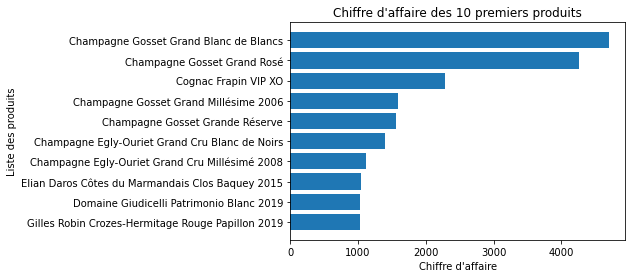

In [77]:
plt.barh(width=dix_premiers['CA_produit'], y=dix_premiers['post_title'])
plt.title("Chiffre d'affaire des 10 premiers produits")
plt.xlabel("Chiffre d'affaire")
plt.ylabel("Liste des produits")
#j'inverse l'axe y pour avoir les valeurs plus élevées en premier.
plt.gca().invert_yaxis()
plt.show()

In [78]:
ca_total = fichier_final['CA_produit'].sum()
print("Le chiffre d'affaire total s'élève à", ca_total, "euros")

Le chiffre d'affaire total s'élève à 70568.6 euros


## Partie 4 - Recherche des valeurs aberrantes

1. Methode des ecarts interquartiles.

In [79]:
produits.describe()

,product_id,price
count,825.000000,825.000000
mean,5162.597576,32.415636
std,902.644635,26.795849
min,3847.000000,5.200000
25%,4348.000000,14.600000
50%,4907.000000,24.400000
75%,5805.000000,42.000000
max,7338.000000,225.000000


Je vais me servir des données de ce site (https://fr.khanacademy.org/math/be-4eme-secondaire2/x213a6fc6f6c9e122:statistiques-1/x213a6fc6f6c9e122:diagramme-en-boite-et-ecart-interquartil/a/identifying-outliers-iqr-rule) pour determiner les outliers avec la méthode des interquartiles.

In [246]:
#On calcule Q1
q1=produits["price"].quantile(q=0.25)
print("Q1:", q1)

#On calcule Q3
q3=produits["price"].quantile(q=0.75)
print("Q3:", q3)

#On calcule l'écart interquartile (IQR)
IQR=q3-q1
print("Ecart interquartile:", IQR)

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR
print("borne sup:", borne_sup)

Q1: 14.6
Q3: 42.0
Ecart interquartile: 27.4
borne sup: 83.1


/Users/cedricmary/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Boite à moustache pour la variable prix'),
 Text(0.5, 0, 'Prix des produits')]

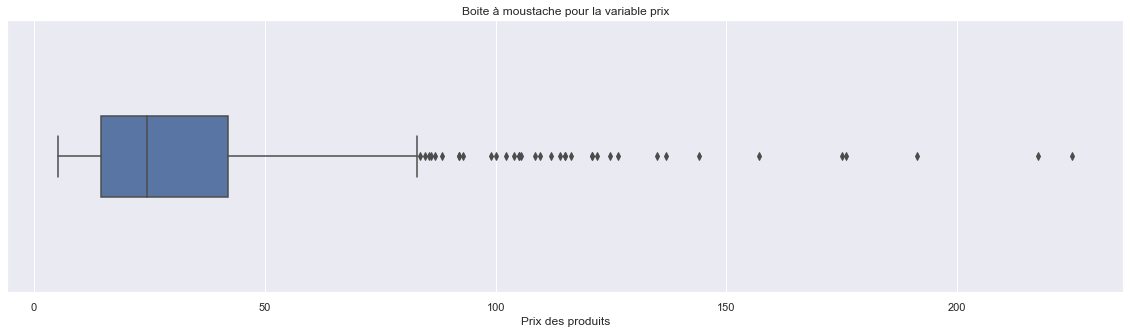

In [261]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(produits['price'], width=0.3).set(title='Boite à moustache pour la variable prix', xlabel='Prix des produits')

Avec cette methode les valeurs supérieures à 83.1 euros sont considérées comme des outliers. Je vais les afficher.

In [109]:
produits[(produits['price'] > 83.1)]

,product_id,price
19,4055,86.1
66,4115,100.0
68,4132,88.4
208,4352,225.0
210,4355,126.5
214,4359,85.6
227,4402,176.0
228,4404,108.5
230,4406,157.0
231,4407,104.0


In [93]:
produits[(produits['price'] > 83.1)].count()

product_id    37
price         37
dtype: int64

Avec cette première méthode nous trouvons donc 37 outliers.

2. Methode du z score

Il est à noter que cette méthode n'est valide qu'à la condition que notre distribution suive une loi normale.

<AxesSubplot:xlabel='price', ylabel='Count'>

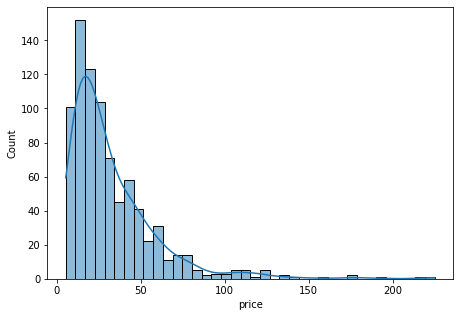

In [99]:
plt.figure(figsize=(16,5)) 
plt.subplot(1,2,1)
sns.histplot(produits['price'], kde=True)

In [100]:
produits['price'].skew()

2.6227973685638717

Le résultat du "skew" est supérieur à 1, ce qui tendrait à montrer que la distribution du prix est "faussée" ou non symétrique. Comme le graphique nous le montre au dessus. Ici pour continuer l'analyse nous supposerons que la distribution du prix suit une loi normale (autrement dit qu'elle est symétrique).

In [101]:
moyenne = np.mean(produits['price'])
ecart_type = np.std(produits['price'])
print('La moyenne du prix est de', round(moyenne, 2))
print("L'ecart type est de", round(ecart_type, 2))

La moyenne du prix est de 32.42
L'ecart type est de 26.78


Le Z score = (x - moyenne) / ecart type
Calcul du Z score. Je place la limite à 2, qui correspond à deux ecart type de la moyenne. Si Z score > 2, j'imprime les différents outliers.

In [102]:
limite = 2
outlier = []
for i in produits['price']:
    z = (i-moyenne)/ecart_type
    if z > limite:
        outlier.append(i)
print("Les outliers sont", outlier)

Les outliers sont [86.1, 100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 144.0, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0, 92.0]


In [106]:
len(outlier)

34

Avec la méthode du z score nous trouvons 34 valeurs considérées commes des outliers.

En conclusion nous avons trouvé effectivement des valeurs extrêmes mais aucunes valeures aberrantes de mon point de vue. Ces valeurs extrêmes correspondent à des vins plus chers mais il n'y a eu aucune erreur de saisie sur le prix d'après les données en ma possession.
